# **Homework: SQLite*


# **Setting Up SQLite for the Student Grades Database**---

## **Step 1: Creating a Connection to SQLite**

In SQLite, the first thing you need to do is establish a **connection** to the database. The connection serves as the link between your Python code and the SQLite databas and conncted!")


In [7]:
import sqlite3

# Create or connect to an SQLite database
connection = sqlite3.connect('student_grades.db')

# Check if the connection was successful
print("Database created and connected!")

Database created and connected!


## **Step 2: Creating the Cursor and Tables**




In [9]:
# Create a cursor object
cursor = connection.cursor()

# Explanation
print("Cursor created!")

Cursor created!


In [15]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL
)
''')

print("student table created!")

cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER references students(student_id),
    subject TEXT,
    grade INTEGER
)
''')

print("grades table created!")


student table created!
grades table created!




## **Step 3: Inserting data into the tables**


In [17]:
# Sample data to insert into the student table
student_data = [
    ('Christopher', 'Joseph'),
    ('Marcus', 'Burnes'),
    ('Steven', 'Strange'),
    ('Mary', 'Reede'),
    ('Charlotte', 'Meyerson')
]

# Insert data into the table
cursor.executemany('''
INSERT INTO students (first_name, last_name) VALUES (?, ?)
''', student_data)

# Commit the transaction
connection.commit()

print("Data inserted into the student table!")

grade_data = [
    (1, 'Math', 83),
    (1, 'Spanish', 74),
    (1, 'Programming', 94),
    (2, 'Psychology', 87),
    (2, 'Chemistry', 82),
    (2, 'Spanish', 77),
    (3, 'Chemistry', 83),
    (3, 'Programming', 97),
    (3, 'Math', 72),
    (4, 'English', 80),
    (4, 'Math', 74),
    (4, 'Psychology', 87),
    (5, 'History', 81),
    (5, 'Programming', 76),
    (5, 'Chemistry', 100)
]

# Insert data into the table
cursor.executemany('''
INSERT INTO grades (student_id, subject, grade) VALUES (?, ?, ?)
''', grade_data)

# Commit the transaction
connection.commit()

print("Data inserted into the grade table!")

Data inserted into the student table!
Data inserted into the grade table!


## **Step 4: Querying the Data**

---

### **1. Retrieve all students' names and their grades.


In [21]:

# Retrieve all students' names and their grades.
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade 
FROM grades
JOIN students ON students.student_id = grades.student_id
''')

# Fetch and display the results
joined_data = cursor.fetchall()

print("Students and their grades:")
for row in joined_data:
    print(row)

Students and their grades:
('Christopher', 'Joseph', 'Math', 83)
('Christopher', 'Joseph', 'Spanish', 74)
('Christopher', 'Joseph', 'Programming', 94)
('Marcus', 'Burnes', 'Psychology', 87)
('Marcus', 'Burnes', 'Chemistry', 82)
('Marcus', 'Burnes', 'Spanish', 77)
('Steven', 'Strange', 'Chemistry', 83)
('Steven', 'Strange', 'Programming', 97)
('Steven', 'Strange', 'Math', 72)
('Mary', 'Reede', 'English', 80)
('Mary', 'Reede', 'Math', 74)
('Mary', 'Reede', 'Psychology', 87)
('Charlotte', 'Meyerson', 'History', 81)
('Charlotte', 'Meyerson', 'Programming', 76)
('Charlotte', 'Meyerson', 'Chemistry', 100)


### **2. Find the average grade for each student.

In [31]:
cursor.execute('''
SELECT AVG(grades.grade), students.first_name, students.last_name
FROM grades
JOIN students ON students.student_id = grades.student_id
GROUP BY students.student_id, students.first_name, students.last_name
''')
average_grades = cursor.fetchall()

print("Students and their grades:")
for row in average_grades:
    print(row)

Students and their grades:
(83.66666666666667, 'Christopher', 'Joseph')
(82.0, 'Marcus', 'Burnes')
(84.0, 'Steven', 'Strange')
(80.33333333333333, 'Mary', 'Reede')
(85.66666666666667, 'Charlotte', 'Meyerson')


### **3. Find the student with the highest average grade.

In [37]:
cursor.execute('''
SELECT AVG(grades.grade), students.first_name, students.last_name
FROM grades
JOIN students ON students.student_id = grades.student_id
GROUP BY students.student_id, students.first_name, students.last_name
ORDER BY grades.grade DESC
LIMIT 1
''')
highest_grade = cursor.fetchall()

print(f"Student with Highest Average Grade: {highest_grade}")

Student with Highest Average Grade: [(82.0, 'Marcus', 'Burnes')]


### **4. Find the average grade for the Math subject.

In [41]:
cursor.execute('''
SELECT AVG(grades.grade)
FROM grades
WHERE subject = "Math"
''')
math_grade = cursor.fetchone()[0]

print(f"Math's Average Grade: {math_grade}")

Math's Average Grade: 76.33333333333333


### **5. List all students who scored above 90 in any subject.

In [43]:
cursor.execute('''
SELECT first_name, last_name
FROM students
JOIN grades ON grades.student_id = students.student_id
WHERE grade >= 90
''')
honor_roll = cursor.fetchall()

print("Students on Honor Roll:")
for row in honor_roll:
    print(row)


Students on Honor Roll:
('Christopher', 'Joseph')
('Steven', 'Strange')
('Charlotte', 'Meyerson')


In [ ]:
# Query for the average revenue per flavor
cursor.execute('''
SELECT AVG(revenue) FROM sales
''')
average_revenue = cursor.fetchone()[0]

# Display the result
print(f"Average revenue per flavor: ${average_revenue}")


In [ ]:
# Query to sort flavors by sales in descending order
cursor.execute('''
SELECT flavor, sales FROM sales ORDER BY sales DESC
''')
sorted_sales = cursor.fetchall()

# Display the results
print("Flavors sorted by sales:")
for sale in sorted_sales:
    print(f"{sale[0]}: {sale[1]} sales")


## **Step 5: Load data into Pandas

---

### **1. Use Pandas to load the data from the students and grades tables into DataFrames.

In [47]:
import pandas as pd

# Query the student and grades data into a DataFrame
df = pd.read_sql_query('SELECT * FROM students', connection)

# Display the DataFrame
df.head()


,student_id,first_name,last_name
0,1,Christopher,Joseph
1,2,Marcus,Burnes
2,3,Steven,Strange
3,4,Mary,Reede
4,5,Charlotte,Meyerson


In [49]:
import pandas as pd

# Query the student and grades data into a DataFrame
df1 = pd.read_sql_query('SELECT * FROM grades', connection)

# Display the DataFrame
df1.head()


,grade_id,student_id,subject,grade
0,1,1,Math,83
1,2,1,Spanish,74
2,3,1,Programming,94
3,4,2,Psychology,87
4,5,2,Chemistry,82


### **2. Use JOIN queries to combine the data from both tables into a single DataFrame that includes each student's name, subject, and grade. 

In [59]:
import pandas as pd

# Query the student and grades data into a DataFrame
df_joined = pd.read_sql_query('''
SELECT first_name, last_name, subject, grade
FROM students
JOIN grades ON grades.student_id = students.student_id
''', connection)

# Display the entire DataFrame
print(df_joined)


     first_name last_name      subject  grade
0   Christopher    Joseph         Math     83
1   Christopher    Joseph      Spanish     74
2   Christopher    Joseph  Programming     94
3        Marcus    Burnes   Psychology     87
4        Marcus    Burnes    Chemistry     82
5        Marcus    Burnes      Spanish     77
6        Steven   Strange    Chemistry     83
7        Steven   Strange  Programming     97
8        Steven   Strange         Math     72
9          Mary     Reede      English     80
10         Mary     Reede         Math     74
11         Mary     Reede   Psychology     87
12    Charlotte  Meyerson      History     81
13    Charlotte  Meyerson  Programming     76
14    Charlotte  Meyerson    Chemistry    100


### **3. Visualize the data with Matplotlib:

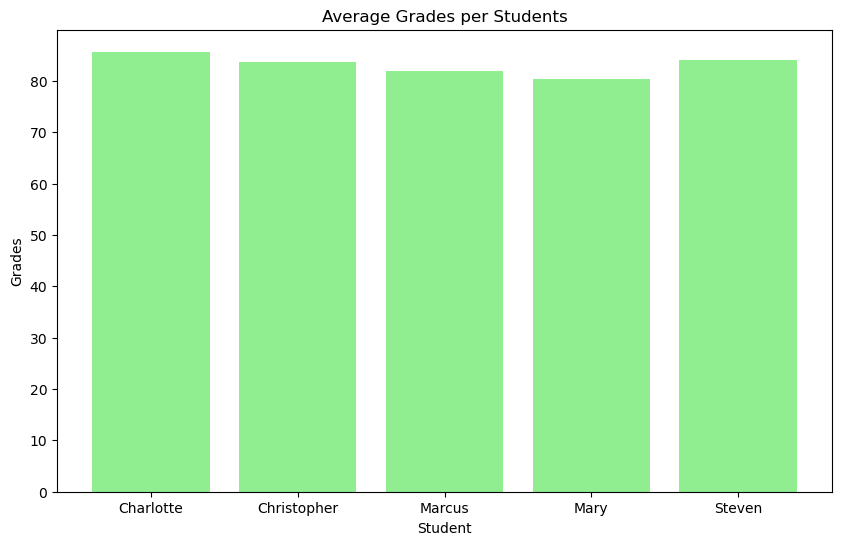

In [71]:
import matplotlib.pyplot as plt

# Plot the average grades for each student
df_avg_joined = pd.read_sql_query('''
SELECT first_name, last_name, subject, AVG(grade)
FROM students
JOIN grades ON grades.student_id = students.student_id
GROUP BY students.first_name, students.last_name
''', connection)

# Plot student data
plt.figure(figsize=(10,6))
plt.bar(df_avg_joined['first_name'], df_avg_joined['AVG(grade)'], color='lightgreen')
plt.xlabel('Student')
plt.ylabel('Grades')
plt.title('Average Grades per Students')
plt.show()


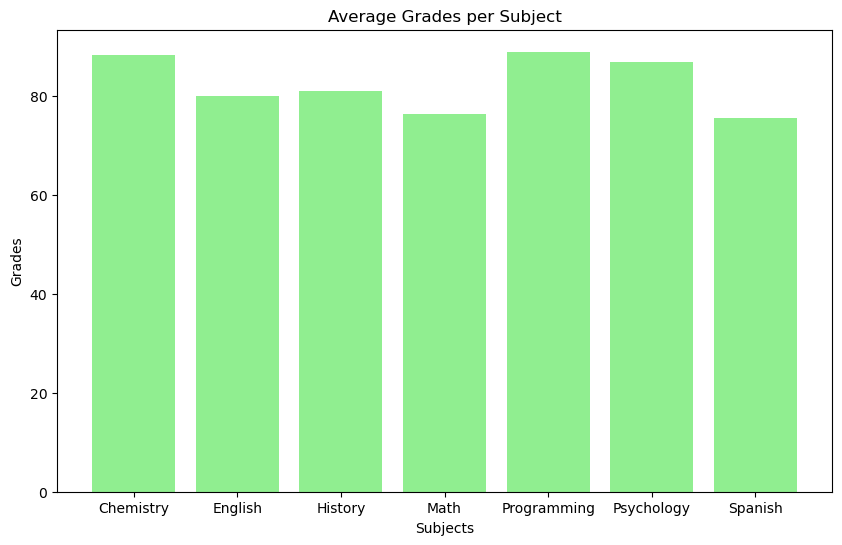

In [81]:
import matplotlib.pyplot as plt

# Plot the average grades for each subject
df_subject_joined = pd.read_sql_query('''
SELECT subject, AVG(grade)
FROM grades
GROUP BY grades.subject
''', connection)

# Plot student data
plt.figure(figsize=(10,6))
plt.bar(df_subject_joined['subject'], df_subject_joined['AVG(grade)'], color='lightgreen')
plt.xlabel('Subjects')
plt.ylabel('Grades')
plt.title('Average Grades per Subject')
plt.show()


In [83]:
# Close the cursor
cursor.close()

# Explanation
print("Cursor closed!")

Cursor closed!
